Dataset - "Business Licences"

Objective:
- Study and visualize trends in the City of Vancouver's businesses.

Notes:
- Dataset is licensed under the 'Open Government Licence - Vancouver' (https://opendata.vancouver.ca/pages/licence/)

In [1]:
from pathlib import Path
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Change Pandas display options

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Constants

DATASET = 'business-licences'
DATA_DIR_PATH = Path.cwd() / 'drive' / 'MyDrive' / 'Vancouver Datasets'

In [4]:
# Functions

def import_data(dataset, data_dir_path):

    data_file_paths = _show_data_files(dataset, data_dir_path)
    data_file_path = _get_file_index(data_file_paths)

    if data_file_path.suffix == '.json':
        data = pd.read_json(data_file_path)
    elif data_file_path.suffix == '.csv':
        data = pd.read_csv(data_file_path, sep=';')

    return data, data_file_path.name


def _show_data_files(dataset, data_dir_path):

    data_file_paths = list(data_dir_path.iterdir())
    relevant_file_paths = [path for path in data_file_paths if dataset.lower() in path.name.lower()]

    for index, file_path in enumerate(relevant_file_paths):
        print(f'({index}) {file_path}')

    return relevant_file_paths 


def _get_file_index(data_file_paths):

    while True:
        try:
            data_file_index = int(input('Enter the index of the data file to be imported, e.g. 0: '))
            data_file_path = data_file_paths[data_file_index]
        except (ValueError, IndexError, TypeError):
            print('Please try again with a valid index.')
        else: 
            return data_file_path


def round_up(value, interval):
    return math.ceil(value / interval) * interval

Import Data

In [ ]:
data, DATA_FILE_NAME = import_data(DATASET, DATA_DIR_PATH)
data.head()

Visualize Data

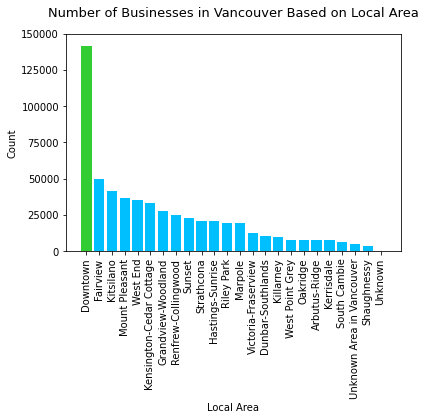

In [6]:
groups = data[data['LocalArea'] != 'Outside of Vancouver'].groupby('LocalArea')
counts = groups['LicenceRSN'].count()
counts.sort_values(ascending=False, inplace=True)

interval = 25_000
ylim = round_up(counts.max(), interval)

colours = []
for idx, value in zip(counts.index, counts):
    if value == counts.max():
        colours.append('limegreen')
    elif idx == 'Unknown':
        colours.append('r')
    else:
        colours.append('deepskyblue')

chart = plt.bar(counts.index, counts.values, color=colours)

plt.xticks(rotation=90)
plt.yticks(np.arange(0, ylim + interval, interval))
plt.ylim(0, ylim)
plt.title('Number of Businesses in Vancouver Based on Local Area', fontsize=13, y=1.05)
plt.xlabel('Local Area')
plt.ylabel('Count')
plt.show()

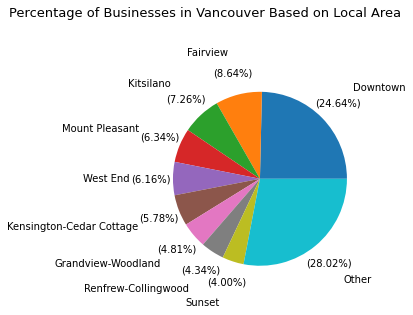

In [7]:
counts_top10 = counts.copy()[0:9]
counts_top10['Other'] = counts[9:].sum()

fig, ax = plt.subplots()

ax.pie(counts_top10.values, labels=counts_top10.index, labeldistance=1.5, autopct='(%.2f%%)', pctdistance=1.25)
fig.suptitle('Percentage of Businesses in Vancouver Based on Local Area', x=0.84, y=1.1, horizontalalignment='right', fontsize=13)

plt.show()

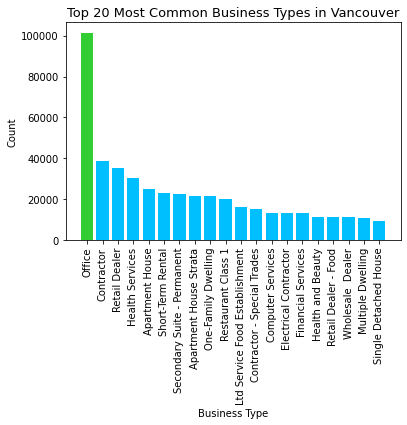

In [8]:
business_type_counts = data['BusinessType'].value_counts()[0:20]

plt.bar(business_type_counts.index[0], business_type_counts.values[0], color='limegreen')
plt.bar(business_type_counts.index[1:21], business_type_counts.values[1:20], color='deepskyblue')
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Business Types in Vancouver', fontsize=13)
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.show()

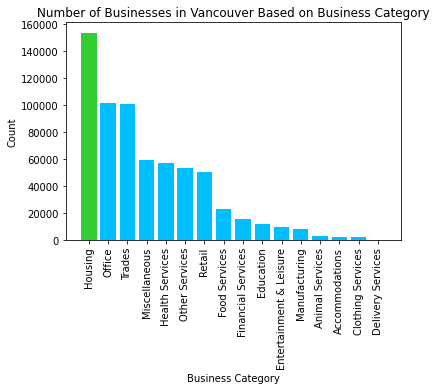

In [9]:
business_cat_counts = data['BusinessCategory'].value_counts()
num_cats = len(business_cat_counts)

fig, ax = plt.subplots()

ax.bar(business_cat_counts.index[0], business_cat_counts.values[0], color='limegreen')
ax.bar(business_cat_counts.index[1:], business_cat_counts.values[1:], color='deepskyblue')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Businesses in Vancouver Based on Business Category')
ax.set_xlabel('Business Category')
ax.set_ylabel('Count')

plt.show()